# Chargement des données : à adapter à votre projet !

Dans notre projet **reconnaissance faciale des membres du groupes**, j'ai choisi de classifier des images associées à 5 labels différents : **ethan**, **jeremy**,**loic**,**lucas et **margaux**.

In [1]:
!git clone https://github.com/Sweb23/Apprentissage-profond.git
path = "./Apprentissage-profond/projet/"

Cloning into 'Apprentissage-profond'...
Updating files:  58% (592/1004)
Updating files:  59% (593/1004)
Updating files:  60% (603/1004)
Updating files:  61% (613/1004)
Updating files:  62% (623/1004)
Updating files:  63% (633/1004)
Updating files:  64% (643/1004)
Updating files:  65% (653/1004)
Updating files:  66% (663/1004)
Updating files:  67% (673/1004)
Updating files:  68% (683/1004)
Updating files:  69% (693/1004)
Updating files:  70% (703/1004)
Updating files:  71% (713/1004)
Updating files:  72% (723/1004)
Updating files:  73% (733/1004)
Updating files:  74% (743/1004)
Updating files:  75% (753/1004)
Updating files:  76% (764/1004)
Updating files:  77% (774/1004)
Updating files:  78% (784/1004)
Updating files:  79% (794/1004)
Updating files:  80% (804/1004)
Updating files:  81% (814/1004)
Updating files:  82% (824/1004)
Updating files:  83% (834/1004)
Updating files:  84% (844/1004)
Updating files:  85% (854/1004)
Updating files:  86% (864/1004)
Updating files:  87% (874/1004)


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Si vous avez construit votre arborescence de la même manière que la mienne, et que vous adaptez les noms de labels à votre projet, alors le code suivant devrait être utilisable directement.

In [3]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

ModuleNotFoundError: No module named 'scipy'

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [ ]:
labels = ['lucas','ethan', 'loic','margaux','jeremy']
path = "./Apprentissage-profond/projet/"

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)

(497, 128, 128, 3) (497, 1)
(259, 128, 128, 3) (259, 1)
(243, 128, 128, 3) (243, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

<ipython-input-10-abc84072baa1>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


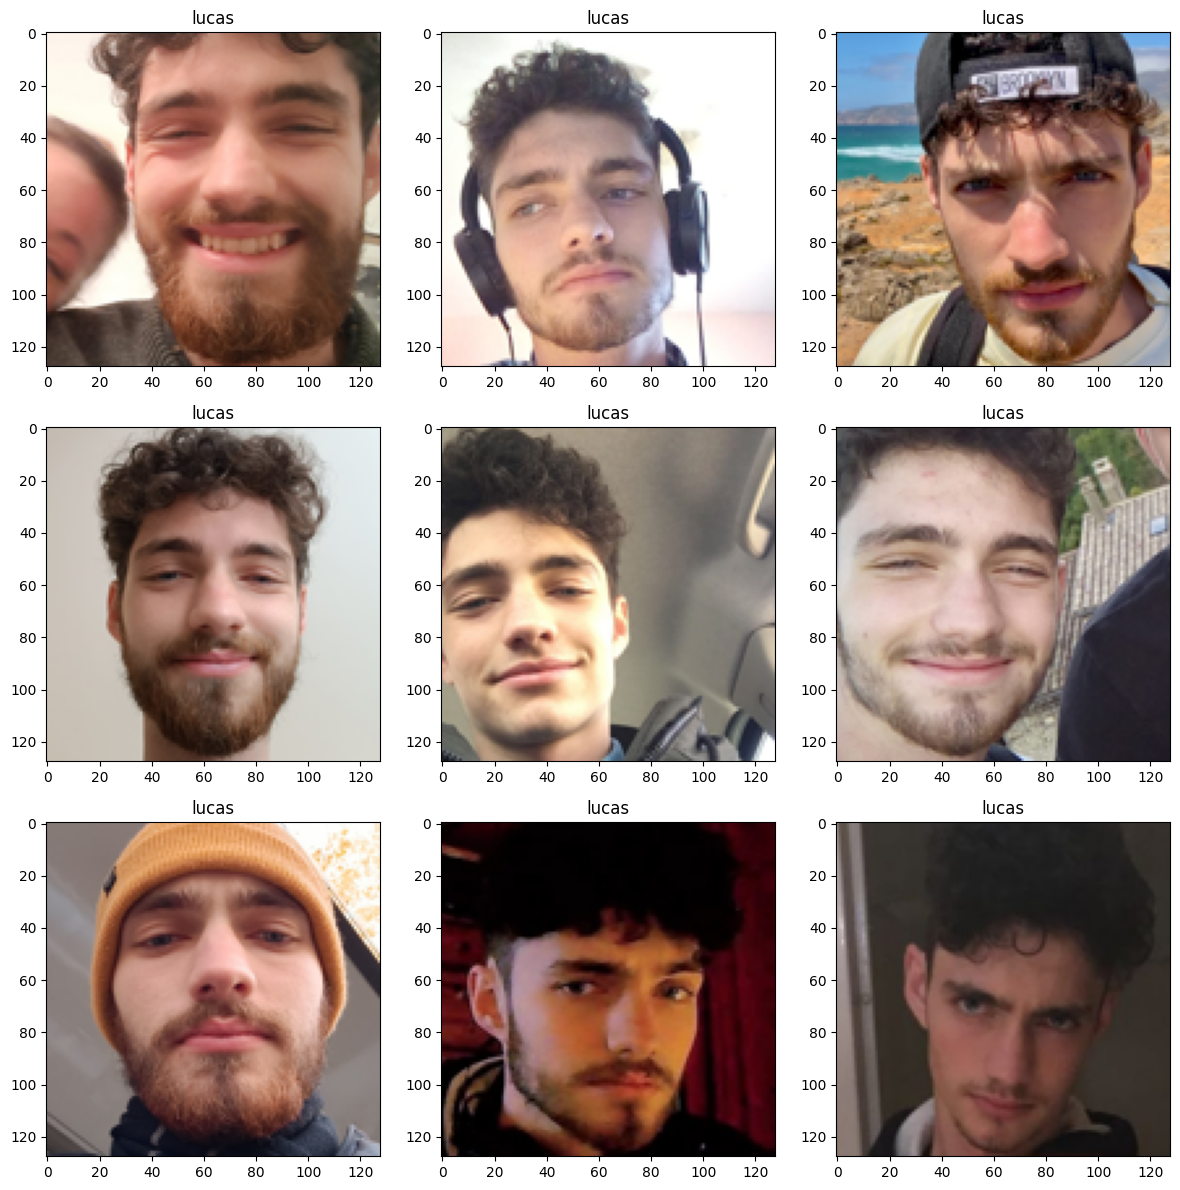

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()